<a href="https://colab.research.google.com/github/sashutosh/DeepLearning/blob/master/PolynomialModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

In [4]:
learning_rate = 0.01
training_epochs=40

In [5]:
#sample input data
trX = np.linspace(-1,1,101)
num_coeffs = 6
trY_coeffs = [1,2,3,4,5,6]
trY =0

In [6]:
#sample output data based on fifth degree polynomial
for i in range(num_coeffs):
  trY+= trY_coeffs[i]*np.power(trX,i)

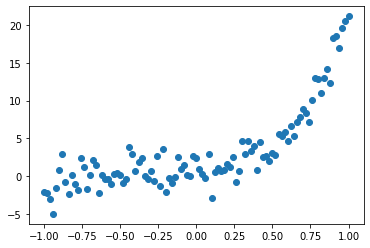

In [7]:
trY+= np.random.randn(*trX.shape)*1.5
plt.scatter(trX,trY)
plt.show()

In [9]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [10]:
#define the polynomial model
def model(X,w):
  terms =[]
  for i in range(num_coeffs):
    term = tf.multiply(w[i], tf.pow(X,i))
    terms.append(term)
  return tf.add_n(terms)

w = tf.Variable([0.]*num_coeffs,name="parameters")
y_model = model(X ,w)


In [11]:
#cost function
cost = (tf.pow((Y -y_model),2))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [12]:
#set up session
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)


In [13]:
#run the learning algorithm
for epoch in range(training_epochs):
  for(x,y) in zip(trX,trY):
    sess.run(train_op,feed_dict={X: x,Y: y})

w_val = sess.run(w)
print(w_val)

[0.7355738 2.012136  5.0621424 4.998105  3.885317  5.1121483]


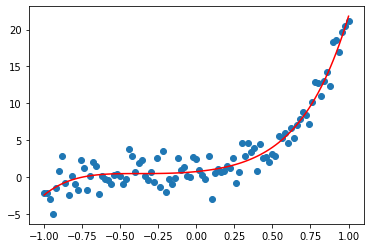

In [14]:
#plot the results
plt.scatter(trX,trY)
trY2 =0

for i in range(num_coeffs):
  trY2 += w_val[i] * np.power(trX,i)

plt.plot(trX,trY2,'r')